In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Physical Mean of Matrix Transformation

Given $\vec{x}$ and $A$
$$
\vec{x} =
\begin{pmatrix}
1 \\ 
3
\end{pmatrix}
, \
A = 
\begin{pmatrix}
2 & 1\\ 
-1 & 1
\end{pmatrix}
$$

Apply $A$ on $\vec{x}$
$$
\vec{y} = A\vec{x} =
\begin{bmatrix}
2 & 1 \\ 
-1 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\ 
3
\end{bmatrix}
=
1
\begin{bmatrix}
2\\
-1
\end{bmatrix}
+ 
3
\begin{bmatrix}
1\\
1
\end{bmatrix}
=
\begin{bmatrix}
5\\ 
2
\end{bmatrix}
$$

is equal to change the basis vectors of $\vec{x}$ from $\left( \begin{bmatrix}1\\ 0\end{bmatrix} \begin{bmatrix}0\\1\end{bmatrix}\right)$ to $\left( \begin{bmatrix}2\\ -1\end{bmatrix} \begin{bmatrix}1\\1\end{bmatrix}\right)$

In [2]:
# Transformation Matrix
A = np.array([[2, 1],
              [-1, 1]])

# Original vector
x = np.array([1, 3])

# Transformed vector
y = A.dot(x)

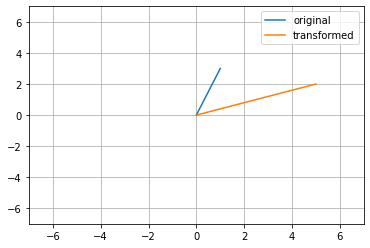

In [3]:
# Construct lines of vectors
origin = np.array([0, 0])
orig_points = np.stack([origin, x])
trans_points = np.stack([origin, y])

# Plot lines
plt.plot(orig_points[:, 0], orig_points[:, 1], label="original")
plt.plot(trans_points[:, 0], trans_points[:, 1], label="transformed")

plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.grid()
plt.legend();

## Physical Mean of Matrix Transformation (Cont')

- Numerical view: **Change the coordinate system**
- Graphical view: **Rotation** and **Stretching**

## Matrix Transformation on Circle

Adopt the graphical view of matrix transformation
![](images/svd/circle-transform.png)

In general view, before applying the transformation matrix, the basis vectors in original space (n-dim):

$$
    \mathbf{V_{org}} = \begin{bmatrix}\vec{v_1} & \vec{v_2} & ... & \vec{v_n}\end{bmatrix}, \text{where $\mathbf{V_{org}}$ is a orthonormal set}
$$

After applying the transformation matrix, the transformed basis vectors now become:

$$
    \mathbf{V_{trans}} = \begin{bmatrix}\sigma_1\vec{u_1} & \sigma_2\vec{u_2} & ... & \sigma_3\vec{u_n}\end{bmatrix}, \text{where $u_i$ is unit vector, and $\sigma_i$ is the stretching amount}
$$

## Matrix Transformation on Circle (Cont')

Here we can say that

$$
    A\vec{v_j} = \sigma_j \vec{u_j},\ \text{where j=1,...,n}
$$

In vector form

$$
    AV = U\Sigma
$$

$\Sigma$ matrix is a diagonal matrix with stretching values on the diagonal axis. And $U$ matrix consists of the transformed basis vectors, which represents the new coordinate system. 

**As we saw before, every matrix $A$ can be represented by two actions in graphical view, which are "ROTATION" and "Stretching"**. The roles of $U$, $\Sigma$, and $V$ are rotation matrix, streching matrix, and rotation matrix respectively.

## Matrix Transformation on Circle (Cont')

As $U$, and $V$ are orthogonal matrixs (basis vectors in their own space), they have the property of unitary matrix. That is,
$$
    M^{-1} = M^{*}
$$
the inverse of a unitary matrix $M$ is the conjugatory transpose of $M$.

Therefore, we can further reduce the equation to
$$
\begin{align}
    AV &= U\Sigma \\
    AVV^{*} &= U \Sigma V^{*} \\
    A &= U \Sigma V^{*}
\end{align}
$$

## Singular Value Decomposition

As the equation derived above, for any matrix $A$, we can represent it by three matrixs, $U$, $\Sigma$, and $V^{*}$. And $A$ is just doing three operaiont in order: **ROTATION** -> **STRETECHING** -> **ROTATION**. 

$$
    A_{mxn} = U_{mxn} \Sigma_{nxn} V^{*}_{nxn}
$$

## Singular Value Decomposition (Cont')

Every matrix $A$ has a single value decomposition, and the following properties are satisfied:
* singular value {$\sigma_j$} are uniquely determined. And if $A$ is square {$\sigma_j$} are distinct.
* {$\vec{u_j}$} and {$\vec{v_j}$} are also unique up to a complex sign

## Singular Value Decomposition (Cont')

**How to compute the SVD of a matrix?**
Here the idea it to transform the problem to a problem of solving eigen value and eigen vector.

$$
\begin{align}
    A^TA &= (U \Sigma V^*)^T (U \Sigma V^*) \\
        &= (V \Sigma U^*) (U \Sigma V^*) \\
        &= V \Sigma^2 V^*
\end{align}
$$

--- 

$$
\begin{align}
    A^TAV &= V \Sigma^2 V^* V \\
        &= V \Sigma^2
\end{align}
$$

---

You can see that the final equation is actually a problem of solving the eigenvector and eigen value of a matrix. By solving the problem, you get the $V$ and $\Sigma$.

To get the value of $U$, you solve the same question for matrix $AA^T$.

## Principle Component Analysis

For a data matrix, $X$, there are always two property inherently existing in the data. That is,
1. Data Noise
2. Data Redundancy

PCA is used to remove the data redundancy in the data.

## Principle Component Analysis (Cont')

PCA has a big relationship with the **variance** and the **covariance** of the data matrix.

- **Variance tells you the dispersion of each measurement in the data**
- **Covariance tells you the dependency between measurements in the data**

## Principle Component Analysis (Cont')

To get the **variance** and the **covariance** of the data matrix, compute the **$X^TX$**

$$
\begin{align}
    Covariance(X) &= X^TX \\
        &= \begin{bmatrix}
            \sigma_{x_1}^2 & \sigma_{x_1x_2}^2 & ... & \sigma_{x_1x_n}^2\\ 
            \sigma_{x_2x_1}^2 & \sigma_{x_2}^2 & ... & \sigma_{x_2x_n}^2\\ 
            ... & ... & ... & ... \\ 
            \sigma_{x_nx_1}^2 & ... & ... & \sigma_{x_n}^2
            \end{bmatrix}
            \end{align}
$$

For values in the diagonal, they are the **variance** for each measurement/feature:
- when the value is small, it means this measurement doesn't have much impact to the data
- when the value is large, it means this measurement have great impact to the data

For values in the off-diagonal, they are the **covariance** between pair of measurements/features:
- when the value is small, it means the measurements are independent to each other
- when the value is large, it means one measurement is dependent on the other (**REDUNDENCY**)
![](images/svd/innerproduct.png)

## Principle Component Analysis (Cont')

The ultimate goal of PCA is to remove the data redundency. Let's see how can we **transform $X$ to another space $Y$ so that the covariance matrix of $Y$ is diagonal**.
> A diagonal covariance matrix indicates that each measurement are independent to other measurements (remove redundency).

## Principle Component Analysis (Cont')
From the perspective of eigen decomposition
$$
    X^TX = S \Lambda S^* 
$$
As $X^TX$ is symmetric, $\Lambda$ is a real positive diagonal matrix representing the eigenvalues, and $S$, $S^*$ is orthogonal matrix representing the eigenvectors

Let's transform $X$ to $Y$ with $S$, and see the covariance matrix of $Y$
$$
\begin{align}
    Y &= XS \\
    Cov(Y) = Y^TY &= (XS)^T(XS) \\
                  &= (S^T X^TX S) \\
                  &= S^T (S \Lambda S^*) S \\
                  &= \Lambda
\end{align}  
$$

Here the covariance matrix of $Y$ is a diagonal matrix, which is what we want.

## Principle Component Analysis (Cont')

From the perspective of SVD
$$
\begin{align}
    X^TX &= (U \Sigma V^*)^T(U \Sigma V^*) \\
         &= (V \Sigma U^*)(U \Sigma V^*) \\
         &= V \Sigma^2 V^*
\end{align}
$$

Let's transform $X$ to $Y$ with $V^T$, and see the covariance matrix of $Y$
$$
\begin{align}
    Y &= XV \\
    Cov(Y) = Y^TY &= (XV)^T(XV) \\
                  &= (V^T X^TX V) \\
                  &= V^T (V \Sigma^2 V^*) V \\
                  &= \Sigma^2
\end{align}  
$$

Here the covariance matrix of $Y$ is a diagonal matrix, which is what we want.

## Principle Component Analysis (Cont')

By now, we know how to transform $X$ to another space $Y$ with the principle axes($V$ and $S$) we found so that the data redundency in original data matrix $X$ is removed.

If we also want to do dimension reduction, you just select the first-nth principle axes from $V$ and $S$ and do the transformation with $X$ so that the new space retain the variance as much as possible with the original space.

In [4]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [5]:
# Experiment with iris dataset
# ========================================================================
# Trying to do dimension reduction on the dataset with PCA maually
# and verified the solution with PCA algorithm implemented in scikit-learn

iris = datasets.load_iris()

In [6]:
X = iris.data
Y = iris.target

print("X Shape:", X.shape)
print("Y Shape:", Y.shape)

X Shape: (150, 4)
Y Shape: (150,)


In [7]:
# Copmute the covariance matrix of X
mu = np.mean(X, axis=0)

Cov_x = ((X-mu).T).dot(X-mu) / X.shape[0]

print(Cov_x)

[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [8]:
# Perform eigen decomposition on Cov_x can find the principle axes
from numpy.linalg import eig

V_sigma_square, V = eig(Cov_x)

print("SIGMA")
print(V_sigma_square)
print()
print("Principle axes")
print(V)

SIGMA
[4.20005343 0.24105294 0.0776881  0.02367619]

Principle axes
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [9]:
# Transform X to X_new with V
X_new = X.dot(V)

In [10]:
# Copmute the covariance matrix of X
mu_new = np.mean(X_new, axis=0)

Cov_x_new = ((X_new-mu_new).T).dot(X_new-mu_new) / X_new.shape[0]

# The covariance matrix of X_new is approximately diagonal matrix
print(Cov_x_new)

[[ 4.20005343e+00  7.57351162e-17 -8.18284893e-16  8.65955946e-16]
 [ 7.57351162e-17  2.41052943e-01  1.80507950e-16  3.00246911e-16]
 [-8.18284893e-16  1.80507950e-16  7.76881034e-02  5.16317604e-17]
 [ 8.65955946e-16  3.00246911e-16  5.16317604e-17  2.36761924e-02]]


## EigenFace

Given a set of images, how can you extract useful information from these images so that we can recognize who he/she is based on the information you extracted.

Data's shape (4, 25, 25)


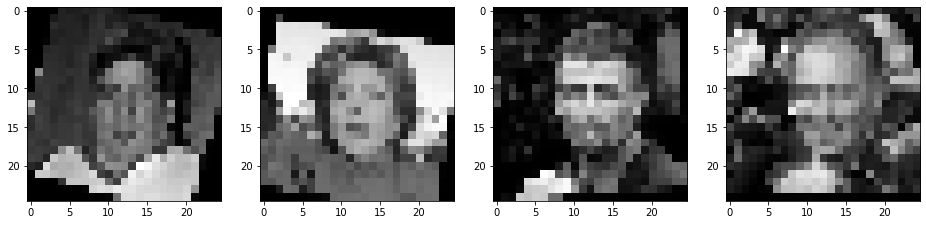

In [11]:
import os
import cv2

# Load face image
images = []

for file in [os.path.join("dataset/eigenface", f) for f in os.listdir("dataset/eigenface/")]:
    image = cv2.imread(file)
    image = cv2.resize(image, (25, 25))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    images.append(gray)
    
images = np.array(images)
print("Data's shape", images.shape)

# Show images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, image in enumerate(images):
    axes[idx].imshow(image, "gray")

## EigenFace (Cont')

You can see that for each image there are 50x50 pixels(features). There must be a great amount of redundancy and noise inside the image. How can remove the noise and redundancy in data?

**Let's use PCA to transform the data to another space, and reduce the dimension(the amount of feature) of the data**

In [12]:
import numpy as np
from numpy.linalg import svd

# Flatten the image
X = images.reshape((images.shape[0], -1))

# Compute the covariance matrix of the image set
Cov_x = (X.T).dot(X)

# Perform eigen decomposition to find principle axes
U, Sigma, V = svd(Cov_x)

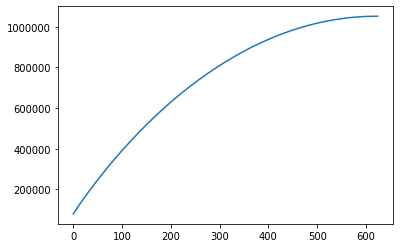

In [13]:
# Plot the cumulative diagram of Sigam to determine the dimensions of the new space
cumulative = []
cumulative_val = 0

for value in Sigma:
    cumulative_val += value
    cumulative.append(cumulative_val)
    
plt.plot(np.arange(len(cumulative)), cumulative)

## EigenFace (Cont')

Given the graph above, I think it is reasonable to choose 400 or 500 dimensions for the new space.

In [14]:
X_new = X.dot(V[:, :400])

print(X.shape)
print(X_new.shape)

(4, 625)
(4, 400)


## EigenFace (Cont')

Then we can visualize the data distribution of each image on the new space. Similiar images should have similiar patterns, and different images should have different patterns.

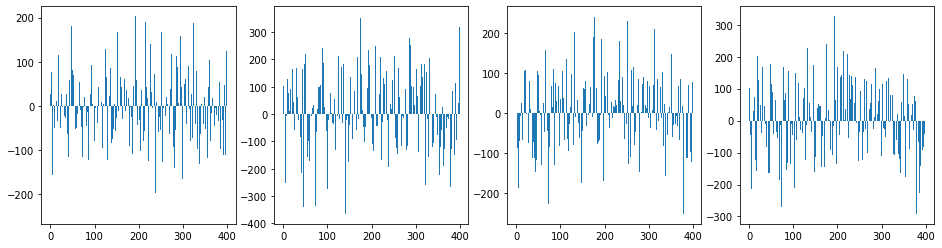

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, features in enumerate(X_new):
    axes[idx].bar(np.arange(len(features)), features)